<a href="https://colab.research.google.com/github/TokaOssama/Volcanic-Eruption-Prediction/blob/main/LSTM_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import os
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import optimizers
from tensorflow.keras import initializers

In [2]:
from google.colab import drive
drive.mount('/content/drive')
Data =np.load('/content/drive/My Drive/Volcano Project/Saveddata.npy')
print(Data.shape)
Data=Data.reshape(Data.shape[0],Data.shape[3],Data.shape[1]*Data.shape[2])
print(Data.shape)

Mounted at /content/drive
(4431, 10, 25, 202)
(4431, 202, 250)


In [3]:
target_file = pd.read_csv ('./drive/My Drive/VolcanicData/train.csv')
target_file.head()


,segment_id,time_to_eruption
0,1136037770,12262005
1,1969647810,32739612
2,1895879680,14965999
3,2068207140,26469720
4,192955606,31072429


In [4]:
filename = []
for file in target_file['segment_id']:
    filename.append('./drive/My Drive/VolcanicData/train/'+str(file)+'.csv')
target_file['filename'] = filename
target_file= target_file.drop('segment_id',axis = 1)
target_file.head()

,time_to_eruption,filename
0,12262005,./drive/My Drive/VolcanicData/train/1136037770...
1,32739612,./drive/My Drive/VolcanicData/train/1969647810...
2,14965999,./drive/My Drive/VolcanicData/train/1895879680...
3,26469720,./drive/My Drive/VolcanicData/train/2068207140...
4,31072429,./drive/My Drive/VolcanicData/train/192955606.csv


In [5]:
tags = np.array(target_file["time_to_eruption"])
Tags=np.array(tags)
print(Tags)

[12262005 32739612 14965999 ... 31206935  9598270 20128938]


In [10]:
#splitting into train and test sets
x_train, x_test, y_train, y_test = train_test_split(Data, tags, test_size=0.25)
x_valid,x_testing,y_valid,y_testing= train_test_split(x_test, y_test, test_size=0.25)
x_train= x_train.astype('float32')
y_train=y_train.astype('float32')
x_test= x_test.astype('float32')
y_test=y_test.astype('float32')
#x_train=np.dstack(x_train).T
#x_test=np.dstack(x_test).T
print(Data.shape)
print(x_test.shape)
print(x_valid.shape)
print(x_testing.shape)
print(x_train)


(4431, 202, 250)
(1108, 202, 250)
(831, 202, 250)
(277, 202, 250)
[[[5.62838440e+01 9.27696075e+01 1.15131271e+02 ... 3.50381775e+01
   2.67264290e+01 3.63048744e+01]
  [2.45253983e+01 4.76569939e+01 5.72999306e+01 ... 5.39692421e+01
   4.26200981e+01 2.02354755e+01]
  [4.20005722e+01 1.19273291e+01 1.78193455e+01 ... 2.32464352e+01
   1.54276285e+01 2.65889683e+01]
  ...
  [4.25178885e-01 6.21179760e-01 2.17578813e-01 ... 2.74784774e-01
   1.58841074e-01 1.03839040e-01]
  [1.47215277e-01 2.19917968e-01 1.50325745e-01 ... 2.19717443e-01
   2.02552259e-01 1.40343249e-01]
  [1.61635786e-01 4.24106151e-01 1.95937797e-01 ... 1.39748231e-01
   3.15264225e-01 0.00000000e+00]]

 [[5.70240898e+01 4.41374130e+01 3.84552765e+01 ... 4.68429108e+01
   4.32981110e+01 3.19762440e+01]
  [8.45434799e+01 8.60690536e+01 2.15573788e+01 ... 3.21263428e+01
   2.34601555e+01 1.02384176e+01]
  [4.30538101e+01 1.93825207e+01 2.08157330e+01 ... 1.55442266e+01
   2.74125404e+01 3.18836269e+01]
  ...
  [3.864980

In [12]:
%cd '/content/gdrive/My\ Drive/'
model =Sequential()
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64,dropout=0.2,return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2]))))
model.add(BatchNormalization())
model.add(Bidirectional(LSTM(64,dropout=0.2,return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2]))))
model.add(BatchNormalization())
#callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.add(Bidirectional(LSTM(64,dropout=0.2,return_sequences=True,input_shape=(x_train.shape[1],x_train.shape[2]))))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(64,activation='relu',kernel_initializer='normal'))
model.add(Dense(32,activation='relu',kernel_initializer='normal'))
model.add(Dense(1,activation='relu',kernel_initializer='normal'))
adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='mae', optimizer=adam)
# fit network
history = model.fit(x_train, y_train, epochs=1000, batch_size=128, validation_data=(x_valid, y_valid), verbose=1, shuffle=False)

[Errno 2] No such file or directory: '/content/gdrive/My\\ Drive/'
/content
Epoch 1/1000
26/26 [==============================] - 13s 174ms/step - loss: 22683626.3704 - val_loss: 22597836.0000
Epoch 2/1000
26/26 [==============================] - 3s 108ms/step - loss: 22683252.0741 - val_loss: 22597352.0000
Epoch 3/1000
26/26 [==============================] - 3s 108ms/step - loss: 22681426.8889 - val_loss: 22594886.0000
Epoch 4/1000
26/26 [==============================] - 3s 107ms/step - loss: 22676138.7407 - val_loss: 22587566.0000
Epoch 5/1000
26/26 [==============================] - 3s 106ms/step - loss: 22664523.0370 - val_loss: 22571524.0000
Epoch 6/1000
26/26 [==============================] - 3s 108ms/step - loss: 22642924.5185 - val_loss: 22541996.0000
Epoch 7/1000
26/26 [==============================] - 3s 109ms/step - loss: 22607061.5556 - val_loss: 22493830.0000
Epoch 8/1000
26/26 [==============================] - 3s 107ms/step - loss: 22552441.5556 - val_loss: 22422324.

In [15]:
test =np.load('/content/drive/My Drive/Volcano Project/working.npy')
print(test.shape)
test=test.reshape(test.shape[0],test.shape[3],test.shape[1]*test.shape[2])
print(test.shape)
print(test)

(4520, 10, 25, 202)
(4520, 202, 250)
[[[ 22.84468339  66.23457889  69.8347958  ...  55.70294558  72.15303913
    52.39225631]
  [ 54.12227343  92.97968523  59.95052093 ...  40.02510747  33.38346321
    37.69379337]
  [ 42.46846498  40.52926693  51.03609899 ...  40.66036371  31.27244264
    15.54386169]
  ...
  [  0.           0.           0.         ...   0.           0.
     0.        ]
  [  0.           0.           0.         ...   0.           0.
     0.        ]
  [  0.           0.           0.         ...   0.           0.
     0.        ]]

 [[ 62.19222962 122.95348943  82.28835119 ...  21.84148968  37.6002998
    26.68722232]
  [ 73.17447546 110.80438539  90.15961961 ...  26.15725841  50.19376827
    32.80989569]
  [ 53.75204886  64.29904569  24.91471336 ...  18.52290176  23.11697626
    17.92297968]
  ...
  [  0.48303298   0.48481326   0.58395481 ...   0.73302708   0.50117869
     0.40340273]
  [  0.62246037   0.38502043   0.3334024  ...   0.78565433   0.80754314
     1.16447

In [16]:
submission= pd.read_csv ('/content/drive/My Drive/Volcano/sample_submission.csv')
print(submission)

      segment_id  time_to_eruption
0     1000213997                 0
1      100023368                 0
2     1000488999                 0
3     1001028887                 0
4     1001857862                 0
...          ...               ...
4515   996704281                 0
4516   997630809                 0
4517   998072137                 0
4518   998136924                 0
4519    99975682                 0

[4520 rows x 2 columns]


In [19]:
prediction = model.predict(test)
print(prediction)
submission['time_to_eruption']=prediction
submission.head()
compression_opts = dict(method='zip',archive_name='out.csv')  
submission.to_csv('out3.zip', index=False, compression=compression_opts) 

[[20963764. ]
 [40083296. ]
 [ 9457719. ]
 ...
 [  423676.8]
 [41066560. ]
 [31919064. ]]


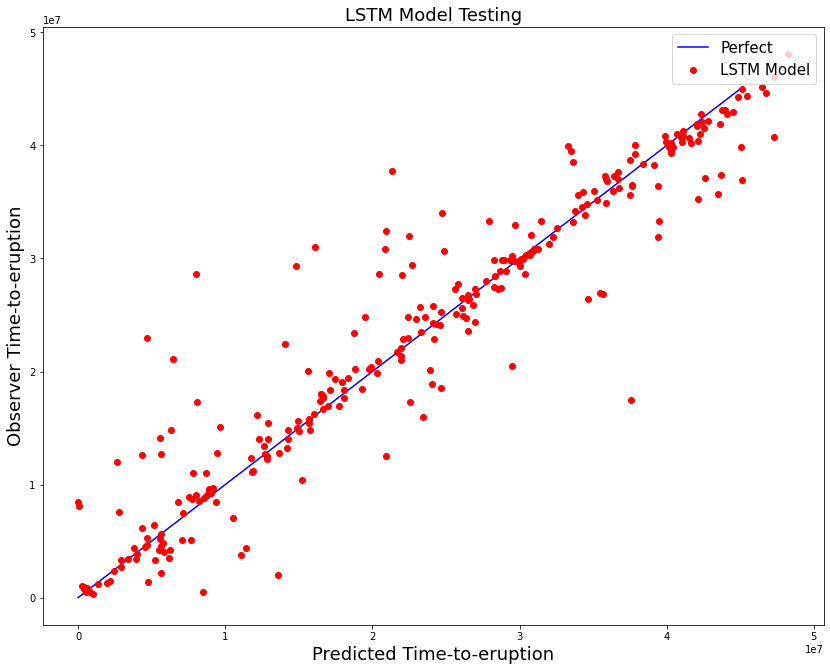

In [18]:
predicted=model.predict(x_testing)
plt.figure(figsize=(14,11))
x = np.linspace(0,45*10**6)
plt.plot(x,x,'b',linestyle='-',label='Perfect')
plt.plot(y_testing,predicted,'r',linestyle='',marker='o',label='LSTM Model')
plt.ylabel('Observer Time-to-eruption',fontsize=18)
plt.xlabel('Predicted Time-to-eruption',fontsize=18)
plt.title('LSTM Model Testing',fontsize=18)
plt.legend(fontsize=15,loc='upper right')
plt.show()

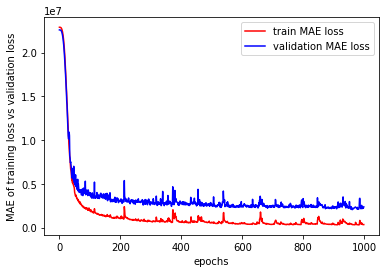

In [22]:
plt.plot(history.history['loss'],'r' ,label='train MAE loss')
plt.plot(history.history['val_loss'],'b' ,label='validation MAE loss')
plt.ylabel('MAE of training loss vs validation loss')
plt.xlabel('epochs')
plt.legend()
plt.show()

In [14]:
score = model.evaluate(x_testing, y_testing,verbose=0)
print(score)

2460357.5
